# Delaunay Core Bifiltration

Odin Hoff Gardå, [https://odinhg.github.io](https://odinhg.github.io/)

In this notebook, we demonstrate how one can use the Delaunay core bifiltration in `multipers` to compute persistent homology of a noisy point cloud.

In [1]:
import multipers as mp
import matplotlib.pyplot as plt
import numpy as np
from multipers.data import three_annulus
from multipers.filtration import CoreDelaunay

np.random.seed(0)

## Background

The core bifiltration was introduced in the paper ["Core Bifiltration"](https://arxiv.org/abs/2405.01214) and is a generalization of the degree-Čech bifiltration (setting $\beta=1/2$). The core bifiltration is interleaved with the well-known multicover bifiltration and is a parameter-free construction that is robust to noise (in the sense of stability with respect to the Prokhorov metric). Intersecting with Voronoi cells in the usual way, one obtains the Delaunay core bifiltration which is a bifiltration of the Delaunay complex. The Delaunay core bifiltration is interleaved with the core bifiltration and also enjoys similar stability properties.

Consider a finite point cloud $A$ in a metric space. Let $B^\beta_{r,k}(a)$ be the closed metric ball $B(a,r)$ whenever $r/\beta\geq d_k^A(a)$ and the empty set otherwise. Here, $d_k^A(a)$ denotes the distance from $a$ to its $k$-th nearest neighbor in $A$. Now, let $W^\beta_{r,k}(a)$ denote $B^\beta_{r,k}(a)$ intersected with the Voronoi cell of $a$. The Delaunay core bifiltration is then defined in filtration degree $(r,-k)$ as the union of $W^\beta_{r,k}(a)$ for all $a\in A$. Taking the nerve of the covering $\{W^\beta_{r,k}(a)\}$ yields a bifiltered simplicial complex, which is the one implemented in `multipers`.

## Example Usage

### Point Cloud Sample

We start by sampling $2000$ points from three annuli in the plane with $1000$ outliers added.

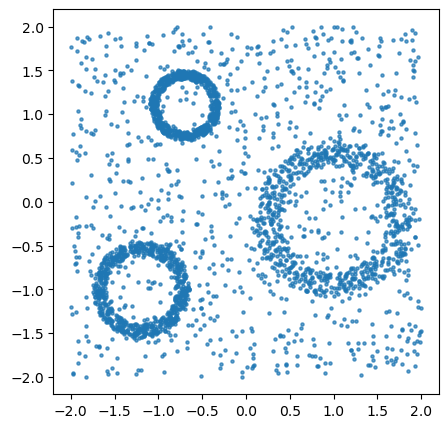

In [2]:
num_pts = 2000
num_outliers = 1000

X = three_annulus(num_pts, num_outliers)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(*X.T, s=5, alpha=0.7)
ax.set_aspect(1)
plt.show()

### Constructing the Delaunay Core Bifiltration

The (Delaunay) core bifiltration takes as input a point cloud in $\mathbb{R}^d$ and a parameter $\beta\in\mathbb{R}_{\geq 0}$ balancing the effect of the radius of balls and $k$-nearest neighbor distances. The implementation in `multipers` also allows for the parameters `k_max` and `k_step` to be specified. These determine the grid used for the second filtration parameter $k$.

In [3]:
k_max = 500
k_step = 10 
beta = 0.5

st = CoreDelaunay(points=X, beta=beta, k_max=k_max, k_step=k_step)

### Computing and Visualizing Persistent Homology

Using `module_approximation` from `multipers`, we compute persistence and visualize it.

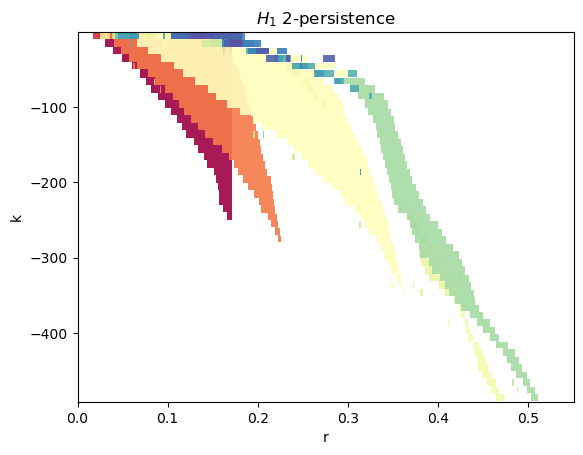

In [4]:
pers = mp.module_approximation(st)
box = mp.grids.compute_bounding_box(pers)
pers.plot(degree=1, alpha=0.9, dpi=400, xlabel="r", ylabel="k", min_persistence=10e-3, box=box)
plt.show()

For completeness sake, we try some different values of the input parameters and now also include $H_0$.

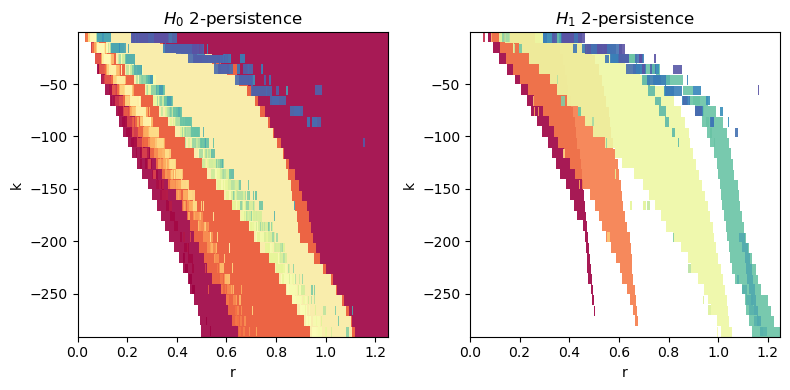

In [6]:
k_max = 300
k_step = 10
beta = 1.5

st = CoreDelaunay(points=X, beta=beta, k_max=k_max, k_step=k_step)

pers = mp.module_approximation(st)
box = mp.grids.compute_bounding_box(pers)
pers.plot(alpha=0.9, dpi=400, xlabel="r", ylabel="k", min_persistence=10e-3, box=box)
plt.tight_layout()
plt.show()